In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [167]:
df = pd.read_csv("Keyboards, Ranked 65bdd211446a4715a2e61ac7d312141e.csv")

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Keyboard Name              110 non-null    object 
 1   Price (subject to change)  109 non-null    float64
 2   Buy Here (affiliate)       104 non-null    object 
 3   Ranking                    110 non-null    float64
 4   Size                       110 non-null    object 
 5   Mounting Style             108 non-null    object 
 6   Switches                   110 non-null    object 
 7   Hot-swappable?             109 non-null    object 
 8   Keycaps                    110 non-null    object 
 9   RGB?                       110 non-null    object 
 10  Plate                      108 non-null    object 
 11  Stabilizers                107 non-null    object 
 12  Software                   99 non-null     object 
 13  Connectivity               109 non-null    object 

In [169]:
df['Ranking'] = df['Ranking'].astype(int)

In [170]:
df['Ranking'].dtype

dtype('int32')

In [171]:
df.describe()

,Price (subject to change),Ranking
count,109.000000,110.000000
mean,126.929083,3.318182
std,72.431514,0.937807
min,23.990000,1.000000
25%,75.990000,3.000000
50%,109.000000,3.500000
75%,170.000000,4.000000
max,499.990000,5.000000


In [172]:
df.head()

,Keyboard Name,Price (subject to change),Buy Here (affiliate),Ranking,Size,Mounting Style,Switches,Hot-swappable?,Keycaps,RGB?,Plate,Stabilizers,Software,Connectivity,Notes
0,Wooting 60 HE,174.99,https://geni.us/jtI08,5,60%,Tray-mount,"North-facing, Pre-lubed, Wooting Lekker Switch",Replaceable with only special switches,"PBT, Shinethrough",Yes,Steel,"Plate-mount, Pre-lubed",Custom software,USB-C,"Hall effect switches, software lets you change..."
1,Keychron C3 Pro,34.99,https://www.keychron.com/products/keychron-c3-...,5,TKL,Gasket-mount,"Keychron K Pro, Pre-lubed",No,"ABS, Shinethrough",Red only,Steel,"Plate-mount, Pre-lubed",QMK/VIA,USB-C,Very affordable Amazon-exclusive Keychron keyb...
2,Epomaker P75,99.00,https://geni.us/rhJzdsm,5,75%,Gasket-mount,"Epomaker, Pre-lubed, South-facing",Universal sockets,"Doubleshot, PBT",Yes,Polycarbonate,"Plate-mount, Pre-lubed",Custom software,"2.4Ghz, Bluetooth, USB-C","Gasket socks, place to store dongle on keyboar..."
3,ASUS Azoth Extreme,499.99,https://geni.us/GiDW,5,75%,Gasket-mount,"ASUS ROG NX Snow, Pre-lubed",Universal sockets,"PBT, Shinethrough",Yes,Carbon Fiber,"N/A, Pre-lubed",ASUS Aura Sync,"2.4Ghz, ASUS SpeedNova, Bluetooth, USB-C","Very expensive prebuilt keyboard, but has a to..."
4,KBDCraft Adam Full Kit,99.99,https://geni.us/BodtUF,5,65%,Gasket-mount,"Pre-lubed, South-facing",Universal sockets,PBT,Yes,POM,Plate-mount,"QMK, VIAL",USB-C,Build-it-yourself case made of bricks (resembl...


In [173]:
df.rename(columns={'Price (subject to change)': 'Price'}, inplace=True)

In [174]:
df['Company Name'] = df['Keyboard Name'].apply(
    lambda x: 'Yunzii' if 'YUNZII' in x or 'Yunzii' in x else 
               'HK Gaming' if 'HK Gaming' in x else
               ' '.join(x.split()[:2]) if x.startswith('Royal ') and len(x.split()) > 1 else 
               x.split()[0]
)

# Remove 'Gaming' from Keyboard Name if it was identified as the company
df['Keyboard Name'] = df['Keyboard Name'].apply(
    lambda x: x.replace('Gaming', '').strip() if 'HK Gaming' in x else x
)

In [175]:
df['Keyboard Name'] = df['Keyboard Name'].str.split(' ', n=1).str[1]
df[['Company Name','Keyboard Name']]

,Company Name,Keyboard Name
0,Wooting,60 HE
1,Keychron,C3 Pro
2,Epomaker,P75
3,ASUS,Azoth Extreme
4,KBDCraft,Adam Full Kit
...,...,...
105,Kinesis,Freestyle Pro
106,HK Gaming,GK61
107,Razer,Cynosa Lite
108,Drop,Sense75


In [81]:
# Get the value counts
company_counts = df['Company Name'].value_counts()

# Replace the company names with 'Other' where the count is 1
company_counts = company_counts.apply(lambda x: 'Miscellaneous Companies' if x == 1 else x)

# Group all 'Other' counts together
other_count = (company_counts == 'Miscellaneous Companies').sum()

# Remove individual 'Other' entries and add a single 'Other' entry
company_counts = company_counts[company_counts != 'Miscellaneous Companies']
company_counts['Miscellaneous Companies'] = other_count

# Sort the result (optional)
company_counts = company_counts.sort_values(ascending=False)

In [82]:
company_counts

Company Name
Miscellaneous Companies    25
Keychron                   17
Epomaker                    7
Razer                       6
Royal Kludge                6
ASUS                        5
Corsair                     5
Drop                        4
Logitech                    4
Redragon                    3
Tecware                     3
IQUNIX                      3
Ducky                       3
Steelseries                 3
Womier                      2
Nuphy                       2
HyperX                      2
Kemove                      2
GMMK                        2
Durgod                      2
Higround                    2
Yunzii                      2
Name: count, dtype: object

C:\Users\admin\AppData\Local\Temp\ipykernel_37712\2317771125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts.index, y=company_counts.values, palette='viridis',legend=True)


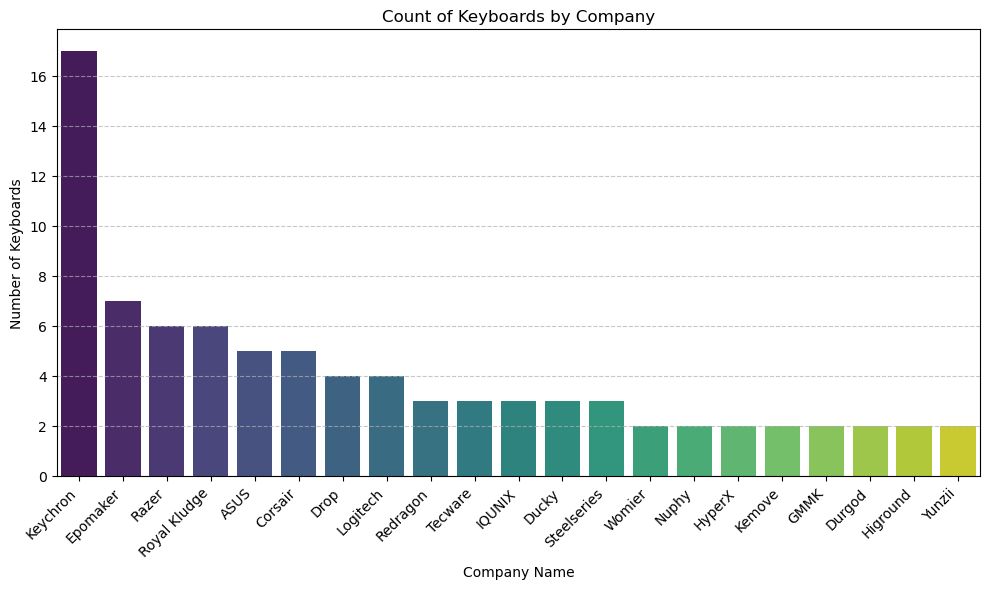

In [83]:
# Setting the size of the plot
plt.figure(figsize=(10, 6))
# dropping the Miscellaneous Companies since these are various companies with just one keyboard to their name that got reviewed.
company_counts.drop('Miscellaneous Companies',inplace=True)
# Create the barplot, this time with the correct x and y variables
sns.barplot(x=company_counts.index, y=company_counts.values, palette='viridis',legend=True)

# Add gridlines to separate bars and make the plot easier to read
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed gridlines

# Add titles and labels
plt.title('Count of Keyboards by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Keyboards')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [84]:
df['Company Name'].nunique()

46

In [85]:
df['Switches'].nunique()

74

In [86]:
df['Keycaps'].value_counts()

Keycaps
PBT                               36
PBT, Shinethrough                 25
ABS, Shinethrough                 24
ABS                                7
ABS, Low-profile, Shinethrough     5
Doubleshot, PBT                    3
Not included                       3
Shinethrough                       2
Doubleshot, Marble-mallow, PBT     1
PBT, Pudding                       1
ABS, PBT, Shinethrough             1
ABS, Doubleshot                    1
Low-profile, Shinethrough          1
Name: count, dtype: int64

In [87]:
df['Stabilizers'].value_counts()

Stabilizers
Plate-mount                     57
Plate-mount, Pre-lubed          26
Pre-lubed, Screw-in             15
Costar                           2
Screw-in                         2
N/A, Pre-lubed                   1
Costar, Pre-lubed                1
Clip-in, Pre-lubed, Screw-in     1
Proprietary                      1
Pre-lubed                        1
Name: count, dtype: int64

In [88]:
df.columns

Index(['Keyboard Name', 'Price', 'Buy Here (affiliate)', 'Ranking', 'Size',
       'Mounting Style', 'Switches', 'Hot-swappable?', 'Keycaps', 'RGB?',
       'Plate', 'Stabilizers', 'Software', 'Connectivity', 'Notes',
       'Company Name'],
      dtype='object')

In [93]:
price_per_brand = df.groupby('Company Name')['Price'].mean().sort_values(ascending=False)

# Display the results
# Convert the Series into a DataFrame
price_per_brand_df = price_per_brand.reset_index()

# Rename the columns for clarity
price_per_brand_df.columns = ['Company Name', 'Average Price']

# Display the DataFrame
price_per_brand_df


,Company Name,Average Price
0,Dygma,349.000000
1,Mountain,249.990000
2,ASUS,245.594000
3,HHKB,239.000000
4,OnePlus,219.000000
5,Higround,217.500000
6,KiiBoom,199.000000
7,IQUNIX,191.330000
8,Idobao,179.000000
9,Wooting,174.990000


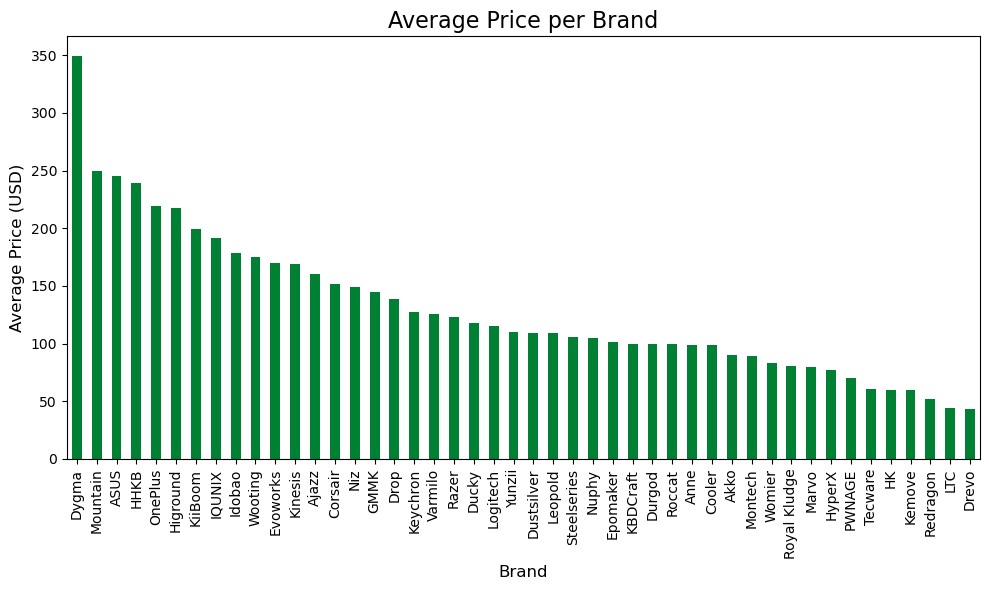

In [94]:
# Plot the average price per brand
plt.figure(figsize=(10, 6))
price_per_brand.plot(kind='bar', color=(0.0, 0.5, 0.2))

# Add titles and labels
plt.title('Average Price per Brand', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

In [95]:
correlation = df['Price'].corr(df['Ranking'])
print(f"Correlation between Price and Ranking: {correlation}")

Correlation between Price and Ranking: 0.2775166184362256


In [96]:
print(df['Ranking'].describe())
print(df['Ranking'].value_counts())

count    110.000000
mean       3.318182
std        0.937807
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: Ranking, dtype: float64
Ranking
4    50
3    36
2    13
1     6
5     5
Name: count, dtype: int64


In [97]:
na_rows = df[df['Price'].isna()]

In [98]:
na_rows

,Keyboard Name,Price,Buy Here (affiliate),Ranking,Size,Mounting Style,Switches,Hot-swappable?,Keycaps,RGB?,Plate,Stabilizers,Software,Connectivity,Notes,Company Name
63,K6,NaN,https://geni.us/C5rYOv,3,65%,Tray-mount,Gateron G Pro,Universal sockets,ABS,Some models,Aluminum,"Plate-mount, Pre-lubed","QMK, VIAL","Bluetooth, USB-C","A really solid option, especially for Mac user...",Keychron


I checked online to see if there is a price for this specific keyboard, and I've found it, and so I added it.

In [99]:
df.loc[63, 'Price'] = 99

In [100]:
df.isna().Price.sum()

0

Here I decided to do use a Linear Regression model to see better the relation between the Price (Y) and the Rank (X) of the Keyboard.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Checking for Linear Regression assumptions:
##### Linearity:

The relationship between the independent variable(s) and the dependent variable is linear. This means that changes in the predictor variable(s) will produce proportional changes in the response variable.
##### Independence:

The residuals (errors) are independent. This means that the residuals should not be correlated with each other, which is particularly important in time series data.
##### Homoscedasticity:

The residuals have constant variance at all levels of the independent variable(s). This means that the spread of the residuals should be roughly the same across all predicted values. The residual plot is used to check for this assumption.
##### Normality of Residuals:

The residuals of the model should be normally distributed, especially for small sample sizes. This assumption can be checked using a histogram or a Q-Q plot of the residuals.
##### No Multicollinearity (if using multiple independent variables):

In the case of multiple regression, the independent variables should not be highly correlated with each other. This assumption is not checked in the residual plots but is important to ensure the stability of coefficient estimates.

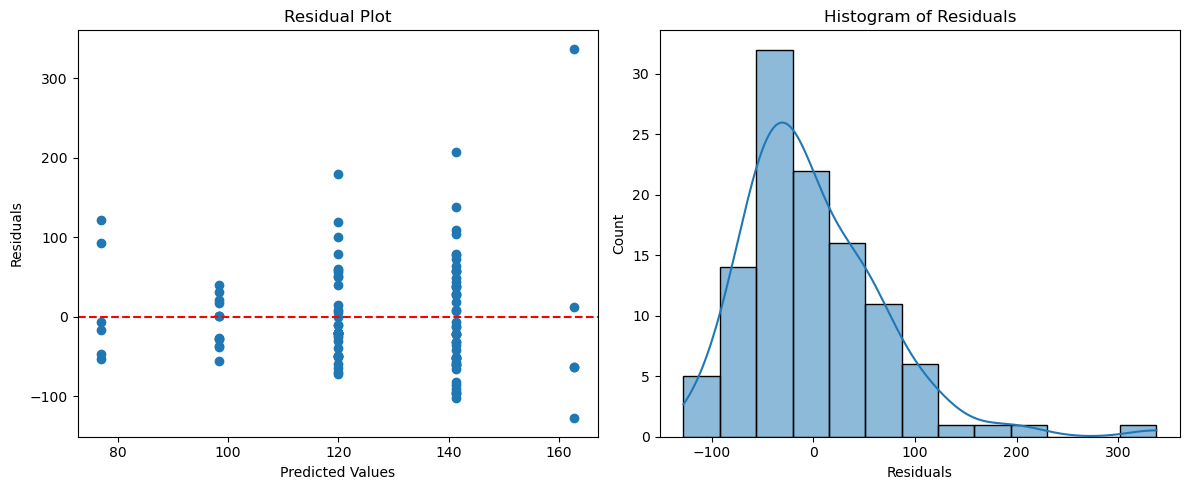

In [102]:
X = df[['Ranking']]  # Independent variable
y = df['Price']     # Dependent variable

# Step 1: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 2: Get predictions
predictions = model.predict(X)

# Step 3: Calculate residuals
residuals = y - predictions

# Step 4: Plot residuals
plt.figure(figsize=(12, 5))

# Residual Plot
plt.subplot(1, 2, 1)
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Histogram of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

### Interpretation of Residual Analysis
Residual Plot (Random Scatter)
Assumptions Checked: Homoscedasticity and Linearity

What It Means: Homoscedasticity refers to the constant variance of residuals across all levels of the independent variable. If the scatter of residuals around the zero line is random and does not show clear patterns (like funneling or systematic curves), then this assumption holds true.
Linearity assumes that the relationship between the independent variable (Ranking) and the dependent variable (Price) is linear. The residual plot confirms this by indicating whether the residuals are randomly scattered without forming identifiable patterns.

What to Look For: A random scatter of residuals around the horizontal axis.
No visible funnel shape (which would indicate heteroscedasticity) or systematic patterns.

Histogram of Residuals (Bell Curve)
Assumption Checked: Normality of Residuals

What It Means: For the linear regression model to perform effectively, the residuals (the differences between actual and predicted values) should follow a normal distribution. This is crucial for valid confidence intervals and hypothesis tests.
What to Look For: The histogram should resemble a bell curve.
A distribution centered around zero and symmetrically shaped suggests that the residuals are normally distributed.

Residual Plot (Scatter Plot)
Assumption Checked: Independence of Residuals

What It Means: Independence of residuals implies that the residuals should not show any clustering or trend. A random distribution of residuals indicates that this assumption holds.

Additional Note on Multicollinearity:
Since there is only one independent variable (Ranking), multicollinearity is not a concern. Multicollinearity occurs only when there are multiple predictors that might be correlated with each other.



Mean Squared Error: 0.869670789750634
R^2 Score: -0.10477864104804957


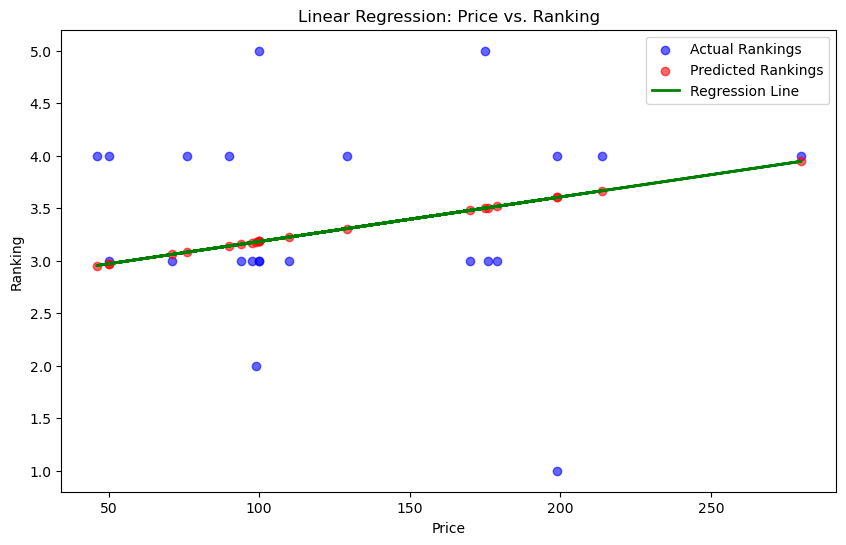

In [103]:
# Step 2: Define X and y
X = df[['Price']] # Independent variable
y = df['Ranking']  # Dependent variable

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Optional: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Rankings', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted Rankings', alpha=0.6)
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('Price')
plt.ylabel('Ranking')
plt.title('Linear Regression: Price vs. Ranking')
plt.legend()
plt.show()

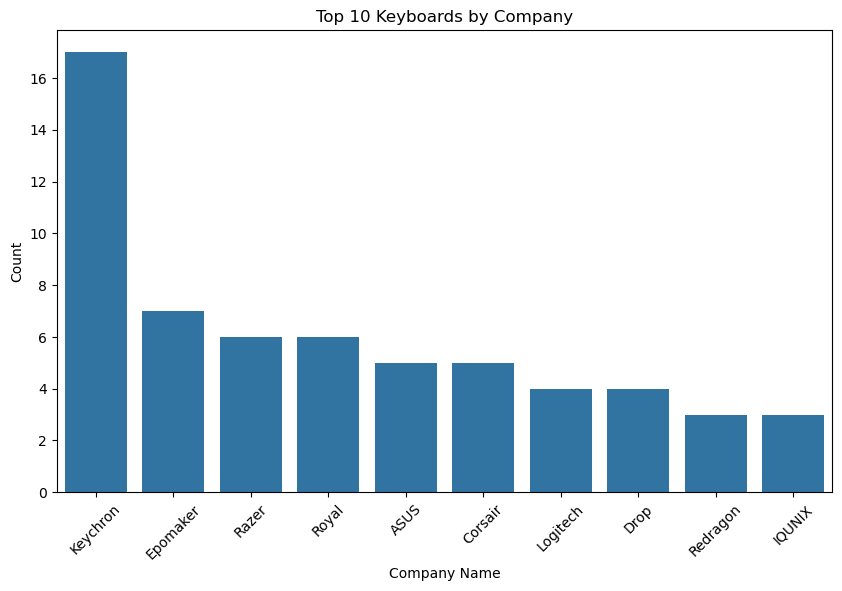

In [292]:
top_n = 10  # Specify how many top companies to show
top_companies = df['Company Name'].value_counts().nlargest(top_n).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Company Name'].isin(top_companies)], x='Company Name', order=top_companies)
plt.title(f'Top {top_n} Keyboards by Company')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [105]:
# Calculate average price and count of keyboards for each company
average_price = df.groupby('Company Name').agg({'Price': 'mean', 'Keyboard Name': 'count','Ranking':'mean'}).reset_index()

# Rename columns for clarity
average_price.rename(columns={'Price': 'Average Price', 'Keyboard Name': 'Keyboard Count'}, inplace=True)

# Sort by Keyboard Count to get the top 10 companies
top_companies = average_price.sort_values(by='Keyboard Count', ascending=False).head(10)

# Display the result
top_companies

,Company Name,Average Price,Keyboard Count,Ranking
23,Keychron,126.100000,17,3.705882
12,Epomaker,101.135714,7,3.428571
39,Royal Kludge,80.991667,6,3.833333
36,Razer,122.891667,6,3.000000
5,Corsair,151.988000,5,3.000000
0,ASUS,245.594000,5,3.600000
28,Logitech,115.420000,4,2.750000
7,Drop,139.000000,4,1.750000
8,Ducky,117.666667,3,3.333333
41,Tecware,60.656667,3,4.000000


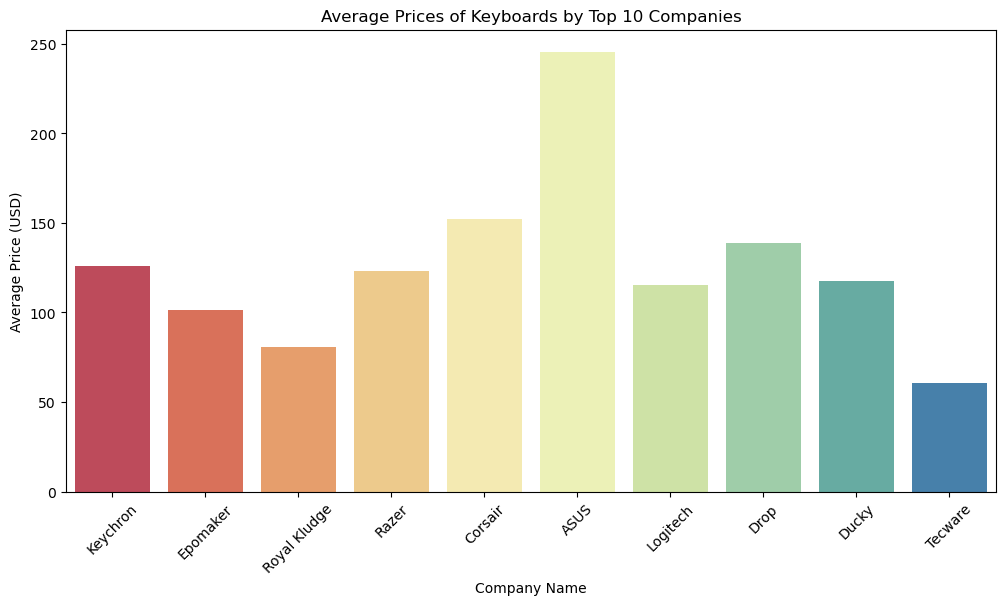

In [106]:
# Visualize Average Prices of Top 10 Companies
plt.figure(figsize=(12, 6))
sns.barplot(data=top_companies, x='Company Name', y='Average Price', hue='Company Name', palette='Spectral', legend=False)
plt.title('Average Prices of Keyboards by Top 10 Companies')
plt.xlabel('Company Name')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

In [179]:
def has_premium_features(row):
    return 'Yes' if row['RGB?'] == 'Yes' or row['Hot-swappable?'] == 'Yes' else 'No'

# Apply the function to create a new column 'Premium Features'
df['Premium Features'] = df.apply(has_premium_features, axis=1)

In [180]:
# Group by company and premium features, then calculate average price and count
premium_analysis = df.groupby(['Company Name', 'Premium Features']).agg(
    Average_Price=('Price', 'mean'),
    Count=('Keyboard Name', 'count')
).reset_index()

# Filter for only premium features
premium_keyboards = premium_analysis[premium_analysis['Premium Features'] == 'Yes']

C:\Users\admin\AppData\Local\Temp\ipykernel_37712\1431230984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=premium_keyboards, x='Company Name', y='Average_Price', palette='coolwarm')


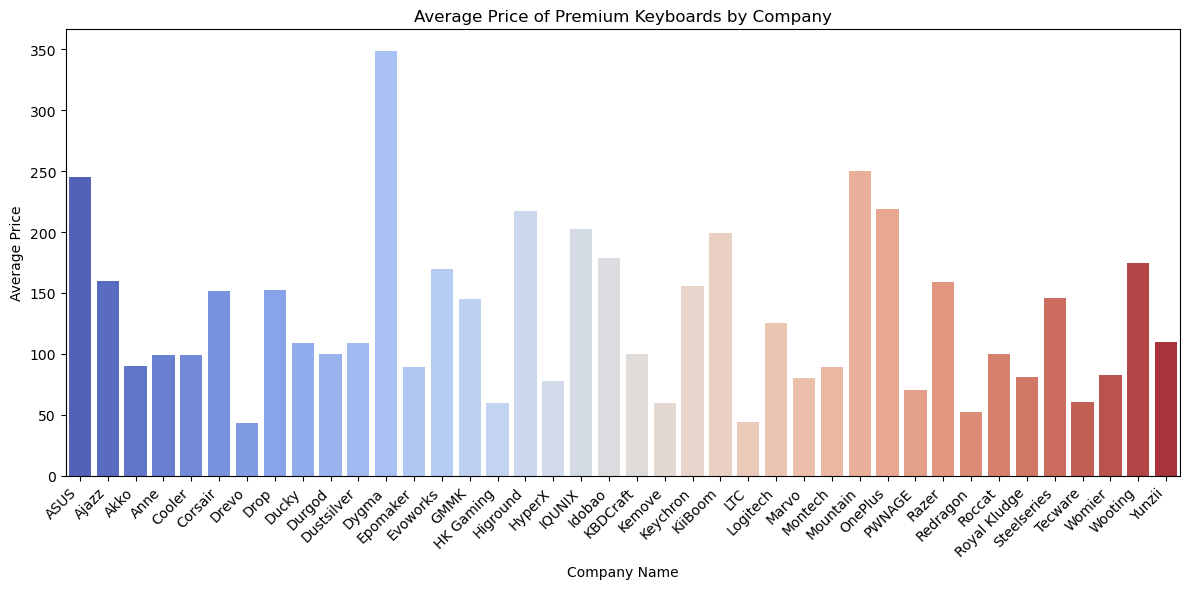

In [181]:
plt.figure(figsize=(12, 6))
sns.barplot(data=premium_keyboards, x='Company Name', y='Average_Price', palette='coolwarm')
plt.title('Average Price of Premium Keyboards by Company')
plt.xlabel('Company Name')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [184]:
df['Plate'].unique()

array(['Steel', 'Polycarbonate', 'Carbon Fiber', 'POM', 'Aluminum',
       'FR4, PP', 'FR4', 'Iron', 'FR4, Polycarbonate, Steel',
       'Aluminum, Brass, Polycarbonate', nan], dtype=object)

In [217]:
# Define a mapping dictionary for weight ranks
weight_rank_mapping = {
    'Brass': 10,
    'Iron': 9,
    'Steel': 8,
    'FR4, Polycarbonate, Steel': 7,
    'Carbon Fiber': 6,
    'FR4': 5,
    'Aluminum': 4,
    'POM': 3,
    'FR4, PP': 2,
    'Polycarbonate': 1,
    # Add more mappings as necessary
}

# Function to assign weight rank based on the plate materials
def get_weight_rank(materials):
    # Split materials by comma and trim spaces
    materials_list = [material.strip() for material in materials.split(',')] if isinstance(materials, str) else []
    # Get the ranks and filter out None values
    ranks = [weight_rank_mapping.get(material) for material in materials_list if weight_rank_mapping.get(material) is not None]
    return min(ranks) if ranks else None  # Return min rank or None if ranks is empty

# Add 'Weight Rank' column to the DataFrame
df['Plate Weight Rank'] = df['Plate'].apply(get_weight_rank)

# Check the updated DataFrame
print(df[['Plate', 'Plate Weight Rank']])

             Plate  Plate Weight Rank
0            Steel                8.0
1            Steel                8.0
2    Polycarbonate                1.0
3     Carbon Fiber                6.0
4              POM                3.0
..             ...                ...
105       Aluminum                4.0
106       Aluminum                4.0
107            NaN                NaN
108       Aluminum                4.0
109       Aluminum                4.0

[110 rows x 2 columns]


In [218]:
def has_premium_features(row):
    return 'Yes' if row['Plate Weight Rank'] >= 7 or row['Hot-swappable?'] == 'Yes' else 'No'

# Apply the function to create a new column 'Premium Features'
df['Premium Features'] = df.apply(has_premium_features, axis=1)

In [219]:
# Group by company and premium features, then calculate average price and count
premium_analysis = df.groupby(['Company Name', 'Premium Features']).agg(
    Average_Price=('Price', 'mean'),
    Count=('Keyboard Name', 'count')
).reset_index()

# Filter for only premium features
premium_keyboards = premium_analysis[premium_analysis['Premium Features'] == 'Yes']

C:\Users\admin\AppData\Local\Temp\ipykernel_37712\1431230984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=premium_keyboards, x='Company Name', y='Average_Price', palette='coolwarm')


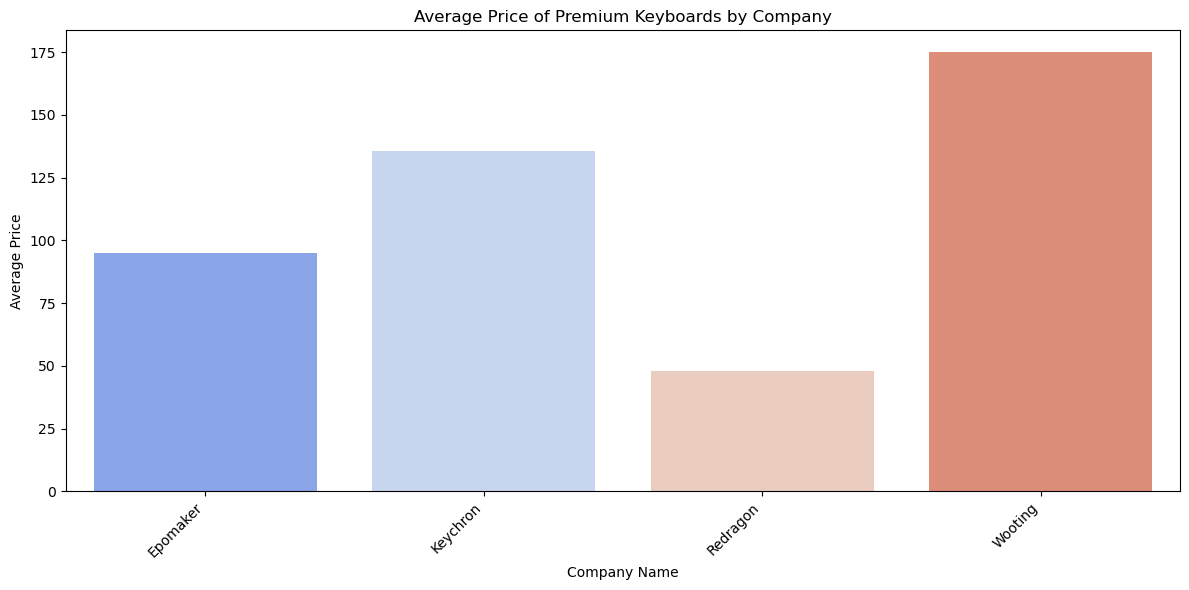

In [214]:
plt.figure(figsize=(12, 6))
sns.barplot(data=premium_keyboards, x='Company Name', y='Average_Price', palette='coolwarm')
plt.title('Average Price of Premium Keyboards by Company')
plt.xlabel('Company Name')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [220]:
df.query('`Company Name` == "Redragon"')

,Keyboard Name,Price,Buy Here (affiliate),Ranking,Size,Mounting Style,Switches,Hot-swappable?,Keycaps,RGB?,Plate,Stabilizers,Software,Connectivity,Notes,Company Name,Premium Features,Weight Rank,Plate Weight Rank
14,K552,38.99,https://geni.us/loSp,4,TKL,Tray-mount,"North-facing, Outemu, Unlubed",Outemu switches only,"ABS, Shinethrough",Yes,Aluminum,Plate-mount,NaN,Nondetachable,The classic keyboard to buy on a budget. Also ...,Redragon,No,7.0,4.0
60,Azure,69.99,https://geni.us/cs19cB,3,75%,Tray-mount,Low-profile,No,"Low-profile, Shinethrough",Yes,Aluminum,Plate-mount,Custom software,"2.4Ghz, Bluetooth, USB-C","It is a very affordable low-profile keyboard, ...",Redragon,No,7.0,4.0
76,K530 Pro Draconic 60%,47.99,https://geni.us/CAd0,3,60%,Tray-mount,"North-facing, Unlubed",Universal sockets,Shinethrough,Yes,Steel,Plate-mount,Custom software,"2.4Ghz, Bluetooth, USB-C",Also available in a barebones version with no ...,Redragon,Yes,3.0,8.0


In [221]:
premium_keyboards

,Company Name,Premium Features,Average_Price,Count
13,Epomaker,Yes,94.990000,2
25,Keychron,Yes,135.601429,7
40,Redragon,Yes,47.990000,1
47,Wooting,Yes,174.990000,1
